# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.


**Introduction for the project**

The purpose of this report is to examine the dataset of published advertisements for vehicles and determine what vehicle characteristics influence a vehicle's price. 

In the report hereinafter, I will assess what factors affect a vehicle's price. To complete the analysis I will remove duplicated rows, fix problematic values in the data, fill in missing values and add columns to the dataset, as required. Once the dataset is preprocessed and clean, I will determine whether there are outliers in the dataset, remove them as I deem necessery, and draw conclusions correlating between the price of a vehicles and other core parameters of the vehicles. 


## Initialization

Before I begin this report, I will load the necessary libraries. This section might be updated along the way.

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

### Load data

I have loaded the dataset and called it "vehicles". 

In [2]:
vehicles = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 2/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


I have printed the dataset's info - the dataset has 51,525 rows and 13 columns. At a glance, it is noticeable that there are missing values in the dataset. The dataset consists of three data types - float64, int64 and object.

In [4]:
vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Once I printed both the dataset's info and sample, it is noticeable that there are some columns with fewer values and some data types that are incorrect - e.g., the model_year column has a missing value in row 1 and the column's data type is a float when it should be int. Also, there is a missing value in row 3 of the odometer column and missing values in the paint_color column. In the is_4wd column there are several missing values in the first 15 rows and the data type is a float, instead of int.  

The missing values and possible outliers in the dataset will be further investigated in this report. 

In [5]:
vehicles.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,51525.0,NaN,NaN,NaN,12132.46492,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,47906.0,NaN,NaN,NaN,2009.75047,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
model,51525,100,ford f-150,2796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51525,6,excellent,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,46265.0,NaN,NaN,NaN,6.125235,1.66036,3.0,4.0,6.0,8.0,12.0
fuel,51525,5,gas,47288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,43633.0,NaN,NaN,NaN,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
transmission,51525,3,automatic,46902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51525,13,SUV,12405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,42258,12,white,10029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the describe() method, it is visible that there is additional problematic data, not only missing values and incorrect data types. It is clear that there are outliers and other improbable or problematic data in the dataset, that would require further investigation - e.g., outliers in the price column, model_year column and more. Also, some cars have zero mileage. 

In [6]:
vehicles.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

By printing the data types of the dataset it is clear that at least two columns seem to be "float" type when they should be "int" type: model_year (e.g., 2013.0), is_4wd (e.g. 1.0), instead of int (2013 and 1, respectively). It should also be noted that the date_posted is an object, an incorrect data type. 

In [7]:
for i in vehicles:
    if vehicles[i].isnull().sum()>0:
        print(i)

model_year
cylinders
odometer
paint_color
is_4wd


I have printed a list of columns in the dataset where there are null (missing) values - there are five columns with missing values that will be further investigated hereinafter. 

In [8]:
print(vehicles['model_year'].isnull().value_counts())
print()
print(vehicles['cylinders'].isnull().value_counts())
print()
print(vehicles['odometer'].isnull().value_counts())
print()
print(vehicles['paint_color'].isnull().value_counts())
print()
print(vehicles['is_4wd'].isnull().value_counts())

False    47906
True      3619
Name: model_year, dtype: int64

False    46265
True      5260
Name: cylinders, dtype: int64

False    43633
True      7892
Name: odometer, dtype: int64

False    42258
True      9267
Name: paint_color, dtype: int64

True     25953
False    25572
Name: is_4wd, dtype: int64


As noted above, there are five columns with missing values (i.e., less than 51,525 values): 
- model_year with 3,619 missing values.
- cylinders with 5,260 missing values. 
- odometer with 7,892 missing values.
- paint_color with 9,267 missing values.
- is_4wd with 25,572 missing values. 

In [9]:
total_rows = len(vehicles)
missing_val = vehicles.isnull().sum()
ratio = missing_val / total_rows
print(ratio)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64


It is clear that the is_4wd column has approx. 50% of values missing, while the paint_color column has nearly 18% of its values missing, the odometer column approx. 15%, the cylinders column approx. 10% and the model_year  approx. 7%. 

In [10]:
vehicles['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

Scanning the unique values in the model_year column, it is noticeable that there are some problematic values in the data that seem to be either improbable or outliers, e.g. model years between the years 1908-1948. Even cars from the 50's and 60's seem suspicious, but they might be collectibles vintage. This will be further investigated in this report, they might be considered outliers. 

In [11]:
vehicles['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [12]:
vehicles['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

From the abovementioned, we can see that there are 100 different values in the model column. It is also visible from a quick scan of the values that there are duplicate values within the column, e.g. model ford f-250 and ford f250 or ford f-250 sd and ford f-250 super duty. 

Hereinafter I will do a quick scanning of the dataset.

In [13]:
vehicles['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

It seems there are 3 types of transmissions in the data: automatic, manual and other. There are no missing values in the column. 

In [14]:
vehicles['condition'].value_counts() 

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

There are 6 possible conditions the vehicles posted can be in, doesn't seem to be any duplicates in the condition column and no missing values.

In [15]:
vehicles['type'].value_counts() 

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

There are 13 different types of cars in the dataset. There aren't any duplicates in the column.  

In [16]:
vehicles['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

As noted above, more than 50% of the data in the is_4wd column is missing. It also seems that the values in the column are supposed to be either 1 or 0, to indicate either a "Yes"/"No" answer. There are no values in the column that are "0". 

In [17]:
vehicles['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

There doesn't seem to be any duplicates in the paint_color column, either. Although this column has both missing value and some cars' color is "custom". 

In [18]:
vehicles['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

There are no missing values in the fuel column, there are 5 fuel types. The overwhelming majority is cars fueled by gas (47,288 cars). 

### Conclusions and further steps
From the intial analysis of the dataset, I can surmise that the following columns need to be preprocessed: 
 - price: there are no missing values in the column. However, while the mean is 12,132, there are outliers in the dataset since the min is 1 and the maximum is 375,000.
 - model_year: there are missing values in the column (3,619), and there are some unusual values in the column such as 1908, 1929, 1936. While other years might indicate that the car is a collectible vintage (and can still be considered an outlier). Note that the data type in the column is incorrect, a float when it should be an int. 
 - model: there are no missing values in the column. However, there are a few duplicates in the data - if necessary for the this report, it might be wise to categorize by car maker. 
 - cylinders: there are 5,260 missing values in the column. 
 - odometer: there are 7,892 missing values in the column. It also seems that there are some outliers in this column - some cars with 0 mileage while others with up to 990,000 mileage. This should be further investigated, perhaps in connection with the car's model year and condition. 
 - paint_color: there are 9,267 missing values in the column and no duplicates, though some cars are noted to be of "custom" color.  
 - is_4wd: More than half of the values in this column are missing (25,572 out of 51,525). It seems that this column should be comprised of 1s and 0s. However, there are only 1.0s (no 0) and the data type is a float when it should be an int. It is possible that this is a technical issue.
 - date_posted: there are no missing values in the column. However the column's data type is object, while it should be int. 
 
 The following columns appear to be intact: 
 - condition: there doesn't seem to be any missing values in this column and no duplicates, the values are distributed across 6 different conditions: excellent, good, like new, fair, new and salvage. 
 - fuel: there are no missing values in the column and no duplicates. The values are distributed across 5 different types of fuel: gas, diesel, hybrid, electric and other. 
 - transmission: there are no missing values in the column. The lion's share of the listed cars is automatic, while the rest is either manual or other. 
 - type: there are no missing values in this column and there are no visible duplicates. 
 - days_listed: there are no missing values in the column and the days a car is listed range fomr 0 to 271. 

Considering the abovementioned, I will take the following steps preprocessing the dataset:
- I will fill in the missing values in the paint_color column, most likely with the value "unknown" since it appears that there is no way to derive the cars' color from the dataset.
- Next, I will fill in the missing values in the is_4wd column, most likely with 0s, since I can assume that they are missing due to a technical error (especially since there are no 0s at all in the column and more than 50% of the values is missing). 
- Then I will fill in the missing values in the model_year column, most likely with the aid of other columns that can be shed light on the missing values or the most likely model year of the car in question - either condition, odometer and model, or a combination of the data. 
- I will fill in the missing values in the cylinders column, most likely with the aid of the car's model. 
- Last, but not least, I will fill in the missing values in the odometer column, most likely assisted by the car's model year, model and condition.
- Once the missing values are filled, I will check whether there are duplicate row in the dataset.
- Then, I will fix the incorrect data types in column model_year, cylinders, is_4wd and date_posted.  

After the preprocessing part of the report is complete I will add column to the data set that might aid in the analysis of the dataset, I will check the dataset, determine whether there are outliers and what are the limits required for further analysis and save the dataset sans the ouliers as a new dataset - so I will be able to compare the original dataset with the clean dataset and draw conclussions. 

## Treat missing values (if any)

As noted above, there are 5 columns in the dataset with missing values: paint_color, is_4wd, model_year, cylinders and odometer. I will now review each column and fill in the missing values. 

### Missing values in the paint_color column

First, I will review the missing values in the paint_color column. 

In [19]:
vehicles.loc[vehicles['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


From the information above, it is noticeable that we have 9,267 missing values in the column. Since the color of a car seems inconsequential to task at hand and because there is no other information by which I can derive what is the color of the car - I have decided to fill in the missing values in the column with "unknown".

In [20]:
vehicles['paint_color'] = vehicles['paint_color'].fillna('unknown')

I have instructed that the missing values in the column will be filled with "unknown". 

In [21]:
vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


I have printed a sample of 15 rows of the dataset. Note there are no missing values where there once were. 

In [22]:
for i in vehicles:
    if vehicles[i].isnull().sum()>0:
        print(i)

model_year
cylinders
odometer
is_4wd


I have printed the columns with missing values, there are 4 remaining columns and no paint_color column. 

### Missing values in the is_4wd column

Now I will review the missing values in the is_4wd column. 

In [23]:
null_is_4wd = vehicles.loc[vehicles['is_4wd'].isnull()]

I have located all the missing values in the is_4wd column and save them in the variable "null_is_4wd". 
As was abovementioned, the missing values consist more than 50% of the values in the column. 

In [24]:
null_is_4wd.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29


In [25]:
null_is_4wd['model'].value_counts()

toyota camry                     976
honda accord                     948
nissan altima                    802
honda civic                      785
ford focus                       749
                                ... 
subaru forester                   11
ford f150 supercrew cab xlt       11
subaru impreza                    11
jeep wrangler unlimited            8
chevrolet silverado 1500 crew      2
Name: model, Length: 100, dtype: int64

In the cells above, I checked the distribution of the missing values in the is_4wd across the models. As was noted in the data exploration above, there are 100 values in the model column. 
It is also noticeable that the missing values also have 100 values in the model column and that they consist of more than 50% of the values in the column. 
This leads to the conclusion that the values in the is_4wd column are most likely missing due to a technical error. Considering the abovementioned, especially due to the fact that this is either a yes or no value - I will fill the missing values in the column with "0". 

In [26]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna('0')

In [27]:
vehicles.loc[vehicles['is_4wd'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


I have checked whether there are ny values in column is_4wd that are missing - there are none. 

In [28]:
for i in vehicles:
    if vehicles[i].isnull().sum()>0:
        print(i)

model_year
cylinders
odometer


There are three more columns with missing values in the dataset. 

<font color='#32cd32'><b><u> Reviewer Comment. v.1 </u></b></font>

<div class="alert alert-success" >
    
**Success:** Absolutely correct!
</div>

### Missing values in the model_year column

I will now address the missing values in the model_year column. 

In [29]:
vehicles.loc[vehicles['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


I have located the missing values in the column, we can see that there are 3,619 missing values in the column. 

In [30]:
vehicles.model_year.describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

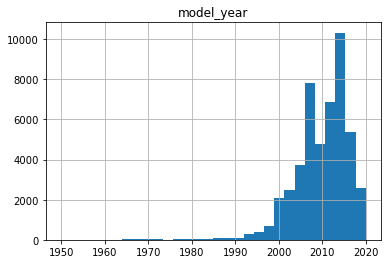

In [31]:
vehicles.hist('model_year', bins=30, range=(1950,2020)) 
plt.show()

We can see that most of the cars' model years are from around ~2005 and there are outliers around model years 1908-2000. The mean of the column is 2009 and while 1st quartile is 2006, the min value in the column is 1908 - almsot a hundred year difference. 

In [32]:
vehicles['model_year'].fillna(vehicles.groupby(['model', 'odometer'])['model_year'].transform('median'), inplace=True)  

I have filled in the missing values with the model_year median grouped by model and odometer. 

In [33]:
vehicles['model_year'].isnull().value_counts()

False    49445
True      2080
Name: model_year, dtype: int64

In [34]:
vehicles['model_year'].describe()

count    49445.000000
mean      2009.760663
std          6.263471
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Once I filled missing values, I have rechecked the dataset using describe() - the distribution seems like it has not been altered significantly. However, there are still 2,080 missing values in the column. I will hereby fill the remaining missing values with the median of model_year grouped only by model. 

In [35]:
vehicles['model_year'].fillna(vehicles.groupby('model')['model_year'].transform('median'), inplace=True)  

In [36]:
vehicles['model_year'].describe()

count    51525.000000
mean      2009.776885
std          6.157231
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

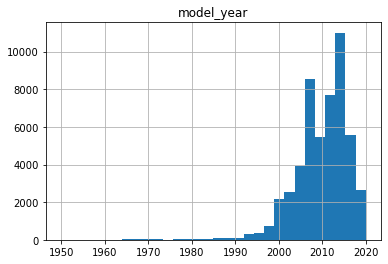

In [37]:
vehicles.hist('model_year', bins=30, range=(1950,2020)) 
plt.show()

I rechecked whether the filling of the missing values created any anomalies in the dataset, it doesn't seem like there are any, and the values are distributed fairly similar to how they were distributed before and there no other missing values in the column. 

In [38]:
for i in vehicles:
    if vehicles[i].isnull().sum()>0:
        print(i)

cylinders
odometer


In this stage there are two columns in the dataset with missing values. 

### Missing values in the cylinders column

In the following cells I will address the missing values in the cylinders column. 

In [39]:
vehicles['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

We can see that there are 7 unique values in the cylinders column, while the most dominant are 4, 6 and 8 cylinders. 
Hereinafter I will further investigate the distribution of the values in the cylinders column. 

In [40]:
vehicles['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

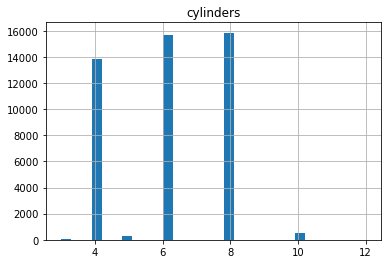

In [41]:
vehicles.hist('cylinders',bins=30) 
plt.show()

In [42]:
vehicles.loc[vehicles['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,unknown,0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,unknown,0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,unknown,0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0,2018-06-22,28


I have located the missing values in the cylinders column. There are 5,260 missing values in the column. 

In [43]:
vehicles['cylinders'].fillna(vehicles.groupby(['model', 'model_year'])['cylinders'].transform('median'), inplace=True) 

I filled the missing values in the column with the median of the column grouped by model and model year. However, as is noted below - even though most of the missing values were filled, there are still some missing values in the column. 

In [44]:
vehicles.loc[vehicles['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1101,9200,1975.0,ford f-150,excellent,NaN,gas,NaN,automatic,truck,green,0,2018-08-28,40
3139,3900,2003.0,ford f-350 sd,good,NaN,gas,NaN,automatic,truck,black,1.0,2018-06-20,59
3844,1900,1986.0,nissan sentra,excellent,NaN,gas,NaN,manual,coupe,blue,0,2018-10-29,63
3914,9750,2007.0,chevrolet silverado 1500 crew,excellent,NaN,gas,133000.0,automatic,pickup,grey,0,2018-08-22,55
5870,2500,2003.0,ford f150 supercrew cab xlt,good,NaN,gas,169000.0,automatic,truck,green,1.0,2019-01-17,18
6932,4000,1993.0,ford f150,excellent,NaN,gas,NaN,automatic,truck,unknown,1.0,2019-01-28,18
6982,3900,1977.0,chevrolet suburban,fair,NaN,gas,NaN,automatic,SUV,custom,0,2019-02-02,71
7113,84900,2019.0,ford f350,new,NaN,diesel,9000.0,automatic,pickup,white,1.0,2019-03-26,7
7121,6900,2009.0,jeep cherokee,excellent,NaN,gas,130023.0,automatic,SUV,black,1.0,2018-09-03,19
11087,16000,1971.0,chevrolet camaro,excellent,NaN,gas,NaN,manual,coupe,brown,0,2018-12-28,125


In [45]:
vehicles['cylinders'].fillna(vehicles.groupby('model')['cylinders'].transform('median'), inplace=True) 

I have filled the remaining missing values with the median of the cylinders column grouped only by the model column and checked once more whether there any other missing values in the column. 

In [46]:
vehicles.loc[vehicles['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


As we can see, there are no missing values in the cylinders column. 

In [47]:
vehicles['cylinders'].describe()

count    51525.000000
mean         6.120243
std          1.657190
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

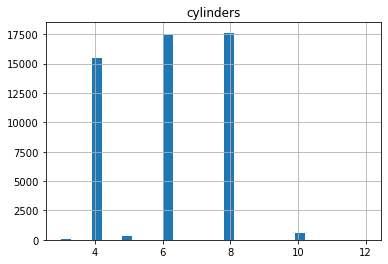

In [48]:
vehicles.hist('cylinders',bins=30) 
plt.show()

Once all the missing values were filled, I have rechecked the distribution in the cylinders column - it seems that the filling in of the missing values have caused no anomalies in the data. 

In [49]:
for i in vehicles:
    if vehicles[i].isnull().sum()>0:
        print(i)

odometer


There is only one column left with missing values. 

### Missing values in the odometer column

Last but not least, I will fill in the missing values in the odometer column. 

In [50]:
vehicles.loc[vehicles['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,unknown,0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,unknown,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,unknown,0,2018-11-24,89


I have located the rows in the dataset with the missing values in the odometer column. 

In [51]:
vehicles['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

We can see that there are some cars with 0 mileage (0 the minmum of the column) and that there is a huge gap between the 3rd quartile and the maximum value in the column: 155,000 and 990,000. 

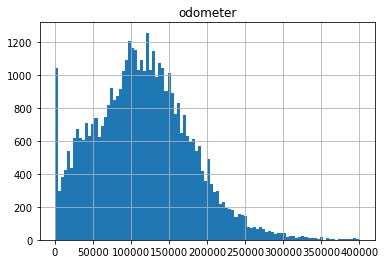

In [52]:
vehicles.hist('odometer', bins=100, range=(0,400000))
plt.show()

We can see that most of the cars in the dataset have between a value of 30,000 and ~190,000. 

In [53]:
vehicles['odometer'].fillna(vehicles.groupby(['model_year', 'model', 'condition'])['odometer'].transform('median'), inplace=True) 

I have filled in the missing values with the median of the odometer column grouped by model_year, model and condition of the car. 

In [54]:
vehicles.loc[vehicles['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0,2018-06-11,40
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0,2019-01-15,16
119,14800,2016.0,kia sorento,like new,4.0,gas,NaN,automatic,SUV,brown,0,2019-02-27,93
310,32000,2016.0,gmc yukon,good,8.0,gas,NaN,automatic,SUV,black,1.0,2019-03-19,37
491,8995,2008.0,dodge dakota,like new,6.0,gas,NaN,automatic,truck,unknown,0,2018-07-09,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50667,1550,1999.0,dodge dakota,excellent,8.0,gas,NaN,automatic,pickup,unknown,1.0,2018-07-06,13
50854,2900,2013.0,hyundai sonata,salvage,4.0,gas,NaN,automatic,sedan,blue,0,2018-10-28,22
50894,1900,2003.0,nissan sentra,good,4.0,gas,NaN,automatic,sedan,silver,0,2018-10-27,43
51272,6650,2010.0,nissan maxima,like new,6.0,gas,NaN,automatic,sedan,red,0,2018-11-04,32


In [55]:
vehicles['odometer'].fillna(vehicles.groupby('model_year')['odometer'].transform('median'), inplace=True) 

I have checked whether there are any remaining missing values in the column. Although most of the missing values were filled, 320 values are still missing. I have decided to fill the remaining missing values with the median of the colum grouped only by the model_year of the car. 

In [56]:
vehicles.loc[vehicles['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0,2018-11-18,59


I have rechecked for missing values and located one missing value. Since the car's model year is 1929 which is obviously an outlier, I have decided to remove this row from the dataset. 

In [57]:
vehicles = vehicles.drop(vehicles.index[45694])

In [58]:
vehicles['odometer'].describe()

count     51524.000000
mean     115454.984032
std       63004.184929
min           0.000000
25%       72000.000000
50%      113918.500000
75%      153772.500000
max      990000.000000
Name: odometer, dtype: float64

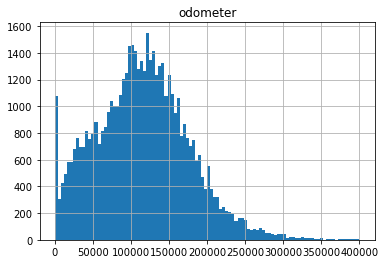

In [59]:
vehicles.hist('odometer', bins=100, range=(0,400000))
plt.show()

I have removed the row with the missing value and model year 1929, so that there are now only 51,524 rows in the dataset and no missing values in the odometer column. I have rechecked the distribution of the column and it doesn't seem like the filling in of the missing values caused any anomalies in the data. 

In [60]:
for i in vehicles:
    if vehicles[i].isnull().sum()>0:
        print(i)

Finally, I have checked whether there are any column in the dataset with missing values - there aren't any. 

## Looking for duplicates

In [61]:
vehicles.duplicated().sum()

0

I have filled all the missing values and checked the dataset for duplicate rows - there are none. 

## Fix data types

I will now check the data types in the dataset and fix them as necessary. 

In [62]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51524 non-null  int64  
 1   model_year    51524 non-null  float64
 2   model         51524 non-null  object 
 3   condition     51524 non-null  object 
 4   cylinders     51524 non-null  float64
 5   fuel          51524 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51524 non-null  object 
 8   type          51524 non-null  object 
 9   paint_color   51524 non-null  object 
 10  is_4wd        51524 non-null  object 
 11  date_posted   51524 non-null  object 
 12  days_listed   51524 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


As we can see we now have 51,524 rows in the dataset and no missing values. 

In [63]:
vehicles.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd           object
date_posted      object
days_listed       int64
dtype: object

As was noted above in the data exploration section, some of the data types of the columns are incorrect: model_year, cylinders, is_4wd and date_posted. 

### Fixing data types in the model_year column

In [64]:
vehicles['model_year'] = vehicles['model_year'].astype(int)

In [65]:
vehicles['model_year'].dtypes

dtype('int64')

In [66]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2014,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


I have altered the data type of the model_year column from float to int, checked that the data type was indeed altered and printed a sample of the dataset. 

### Fixing data types in the cylinders column

In [67]:
vehicles['cylinders'] = vehicles['cylinders'].astype(int)

In [68]:
vehicles['cylinders'].dtypes

dtype('int64')

In [69]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2014,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


I have altered the data type of the cylinders column from float to int, checked that the data type was indeed altered and printed a sample of the dataset. 

### Fixing data types in the is_4wd column

In [70]:
vehicles['is_4wd'] = vehicles['is_4wd'].astype(int)

In [71]:
vehicles['is_4wd'].dtypes

dtype('int64')

In [72]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2014,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


I have altered the data type of the is_4wd column from float to int, checked that the data type was indeed altered and printed a sample of the dataset. 

### Fixing data types in the date_posted column

In [73]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')

I have altered the data type of the date_posted column from object to datetime.

### Rechecking data types

In [74]:
vehicles.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

I have rechecked the data types in the data set - all the data types were altered accordingly. 

## Enrich data

### Adding datetime columns

In [75]:
vehicles['day_posted'] = vehicles['date_posted'].dt.weekday

In [76]:
vehicles['month_posted'] = vehicles['date_posted'].dt.month

In [77]:
vehicles['year_posted'] = vehicles['date_posted'].dt.year

In [78]:
vehicles[['date_posted','day_posted','month_posted','year_posted']].head()

,date_posted,day_posted,month_posted,year_posted
0,2018-06-23,5,6,2018
1,2018-10-19,4,10,2018
2,2019-02-07,3,2,2019
3,2019-03-22,4,3,2019
4,2019-04-02,1,4,2019


I have added 3 new columns indicating the day of the week the ad was posted (0-6, Mon-Sun), the month the ad was posted and year. 

### Adding a column with the vehicle's age

In [79]:
vehicles['vehicle_age'] = vehicles.year_posted-vehicles.model_year

In [80]:
vehicles[['model_year','year_posted','vehicle_age']].head(15)

,model_year,year_posted,vehicle_age
0,2011,2018,7
1,2014,2018,4
2,2013,2019,6
3,2003,2019,16
4,2017,2019,2
5,2014,2018,4
6,2015,2018,3
7,2013,2019,6
8,2012,2018,6
9,2008,2019,11


I have added a column with the age of the vehicle when the ad was posted and printed a sample of the relevant columns and checked that the values in the "vehicle_age" column are accurate. 

In [81]:
vehicles.vehicle_age.describe()

count    51524.000000
mean         8.529870
std          6.160803
min         -1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

In [82]:
vehicles['vehicle_age'] = vehicles['vehicle_age'].replace({ 0 : 1 ,-1 : 1 })

In [83]:
vehicles[vehicles['vehicle_age'] <= 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age


In [84]:
vehicles.vehicle_age.describe()

count    51524.000000
mean         8.572626
std          6.104651
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64


Some Vehicles' age is 0 and -1, I replaced those with "1".
There are no values in the column that are either below 0 or equal to 0. 



### Adding a column with the vehicles average mileage per year

In [85]:
vehicles['ave_mileage_per_year'] = (vehicles['odometer'].where(vehicles['vehicle_age'] == 0 ,round(vehicles['odometer'] / vehicles['vehicle_age'])))

In [86]:
vehicles['ave_mileage_per_year'].head(10)

0    20714.0
1    22176.0
2    18333.0
3    14562.0
4    40452.0
5    14488.0
6    26404.0
7    18246.0
8    17362.0
9    13381.0
Name: ave_mileage_per_year, dtype: float64

I have divided the cars' odometer by their age when the ad was posted and added a column indicating the car's average mileage per year. 

In [87]:
vehicles.describe(include='all').T

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_22582/2804393060.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vehicles.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
price,51524.0,NaN,NaN,NaN,NaT,NaT,12132.35104,10040.86718,1.0,5000.0,9000.0,16836.0,375000.0
model_year,51524.0,NaN,NaN,NaN,NaT,NaT,2009.777599,6.147415,1908.0,2006.0,2011.0,2014.0,2019.0
model,51524,100,ford f-150,2795,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51524,6,excellent,24773,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,51524.0,NaN,NaN,NaN,NaT,NaT,6.120158,1.657217,3.0,4.0,6.0,8.0,12.0
fuel,51524,5,gas,47287,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,51524.0,NaN,NaN,NaN,NaT,NaT,115454.984032,63004.184929,0.0,72000.0,113918.5,153772.5,990000.0
transmission,51524,3,automatic,46902,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51524,13,SUV,12405,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,51524,13,white,10029,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN




I have checked the data and noticed that there are still 0 values in the odometer column (meaning the vaules were not unintentionally altered.  



### Altering the condition values in the condition column

In [88]:
vehicles['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

I have checked the unique values in the condition column. There are 6 values ranging from salvage to new. 

In [89]:
condition_dict = {'salvage':0, 'fair':1, 'good':2, 'excellent':3, 'like new':4, 'new':5}

In [90]:
condition_dict.keys()

dict_keys(['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])

In [91]:
condition_dict.values()

dict_values([0, 1, 2, 3, 4, 5])

I have created a dictionary of the values in the condition column and printed the keys and values of the dictionary. 

In [92]:
condition_dict['excellent']

3

I checked that the dictionary is working correctly and printed an example. 

In [93]:
vehicles['condition'] = vehicles['condition'].map(condition_dict)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,ave_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2014,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,4,22176.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,14562.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0


I used the map() function to implement the dictionary on the condition column in the dataset and printed a sample of the data.

The dictionary was implemented correctly and the cars' condition is in numbers ranging from 0-5. 

## Check clean data

Now that the dataset is cleaned and fixed, I will check the clean dataset. 

In [94]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51524 non-null  int64         
 1   model_year            51524 non-null  int64         
 2   model                 51524 non-null  object        
 3   condition             51524 non-null  int64         
 4   cylinders             51524 non-null  int64         
 5   fuel                  51524 non-null  object        
 6   odometer              51524 non-null  float64       
 7   transmission          51524 non-null  object        
 8   type                  51524 non-null  object        
 9   paint_color           51524 non-null  object        
 10  is_4wd                51524 non-null  int64         
 11  date_posted           51524 non-null  datetime64[ns]
 12  days_listed           51524 non-null  int64         
 13  day_posted      

In [95]:
vehicles.describe(include='all').T

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_22582/2804393060.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vehicles.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
price,51524.0,NaN,NaN,NaN,NaT,NaT,12132.35104,10040.86718,1.0,5000.0,9000.0,16836.0,375000.0
model_year,51524.0,NaN,NaN,NaN,NaT,NaT,2009.777599,6.147415,1908.0,2006.0,2011.0,2014.0,2019.0
model,51524,100,ford f-150,2795,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51524.0,NaN,NaN,NaN,NaT,NaT,2.637548,0.712449,0.0,2.0,3.0,3.0,5.0
cylinders,51524.0,NaN,NaN,NaN,NaT,NaT,6.120158,1.657217,3.0,4.0,6.0,8.0,12.0
fuel,51524,5,gas,47287,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,51524.0,NaN,NaN,NaN,NaT,NaT,115454.984032,63004.184929,0.0,72000.0,113918.5,153772.5,990000.0
transmission,51524,3,automatic,46902,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51524,13,SUV,12405,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,51524,13,white,10029,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,ave_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2014,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,4,22176.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,233000.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,14562.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.0
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,12,2018,3,26404.0
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18246.0
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.0
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.0


I have checked the dataset's information, its distribution and printed a sample of the dataset. All the changes were implemented: there are 51,524 rows, no missing values, the data types are correct, there are 18 columns and the cars' condition is in int.

## Study core parameters

Now that the dataset has been preprocessed and cleaned, I will study the following core parameters:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

I have created a code that I can reapply to each of the core parameters. 
With the assistance of the following code, I will display the distribution of each parameter, determine the skewness of the column and the lower and upper limits of the data (sans the outliers). I will also determine how many outliers there are in each of the parameters. 

In [97]:
def parameters_percentile(parameter):
    print("The histogram of the {} column".format(parameter))
    vehicles[parameter].hist()
    plt.show()
    print("The boxplots of the {} column".format(parameter))
    vehicles.boxplot(parameter)
    plt.show()
    sns.boxplot(x=vehicles[parameter],showfliers = False,orient='v')
    plt.show()
    if vehicles[parameter].mean()>vehicles[parameter].median():
        print("The mean of the column is greater than its median, thus the distribution the {} column is skewed to the right".format(parameter))
    else:
        print("The median of the column is greater than its mean, thus the distribution the {} column is skewed to the left".format(parameter))
    print('---------------------------------------')
    print("The statistics of the {} column are as follows:".format(parameter))
    print(vehicles[parameter].describe())
    ninety_nine = np.percentile(vehicles[parameter], 99)
    three = np.percentile(vehicles[parameter], 3)
    print('---------------------------------------')
    print("The column's minimum border is",three)
    print("The column's maximum border is",ninety_nine)
    print('---------------------------------------')
    print("The outliers in the column are considered to be values below",three, "and above",ninety_nine)
    print("We have",len(vehicles[(vehicles[parameter]<three)|(vehicles[parameter]>ninety_nine)]),"values in the column that can be considered outliers")
    print("In the following section I will save a new dataset without the outliers")
    print()

### Price

The histogram of the price column


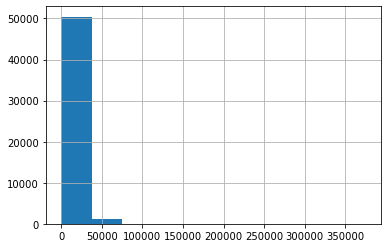

The boxplots of the price column


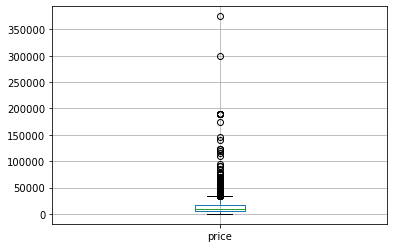

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


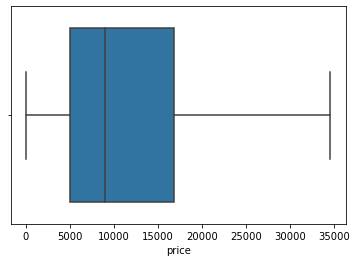

The mean of the column is greater than its median, thus the distribution the price column is skewed to the right
---------------------------------------
The statistics of the price column are as follows:
count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64
---------------------------------------
The column's minimum border is 1000.0
The column's maximum border is 43995.0
---------------------------------------
The outliers in the column are considered to be values below 1000.0 and above 43995.0
We have 1919 values in the column that can be considered outliers
In the following section I will save a new dataset without the outliers



In [98]:
parameters_percentile('price')

### Condition

The histogram of the condition column


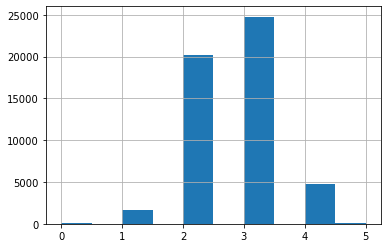

The boxplots of the condition column


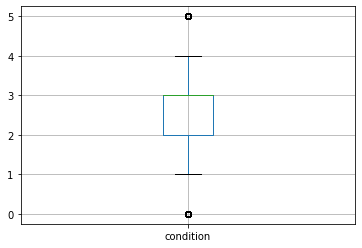

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


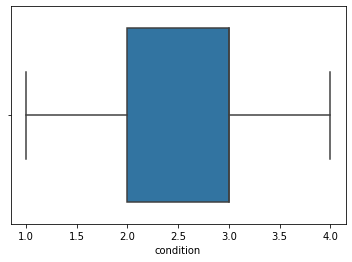

The median of the column is greater than its mean, thus the distribution the condition column is skewed to the left
---------------------------------------
The statistics of the condition column are as follows:
count    51524.000000
mean         2.637548
std          0.712449
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
---------------------------------------
The column's minimum border is 1.0
The column's maximum border is 4.0
---------------------------------------
The outliers in the column are considered to be values below 1.0 and above 4.0
We have 258 values in the column that can be considered outliers
In the following section I will save a new dataset without the outliers



In [99]:
parameters_percentile('condition')

### Vehicle's Age

The histogram of the vehicle_age column


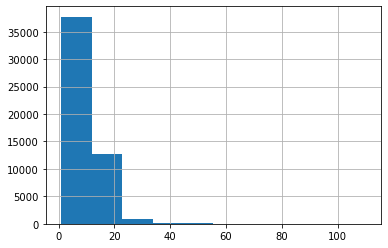

The boxplots of the vehicle_age column


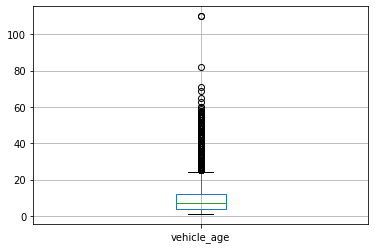

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


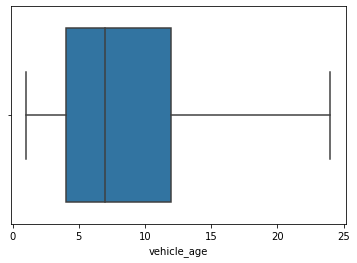

The mean of the column is greater than its median, thus the distribution the vehicle_age column is skewed to the right
---------------------------------------
The statistics of the vehicle_age column are as follows:
count    51524.000000
mean         8.572626
std          6.104651
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
The column's minimum border is 1.0
The column's maximum border is 28.0
---------------------------------------
The outliers in the column are considered to be values below 1.0 and above 28.0
We have 459 values in the column that can be considered outliers
In the following section I will save a new dataset without the outliers



In [100]:
parameters_percentile('vehicle_age')

### Mileage

The histogram of the odometer column


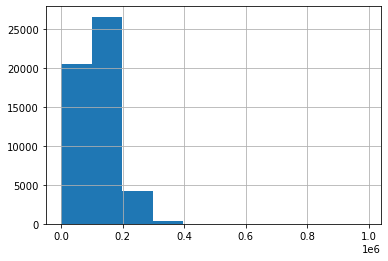

The boxplots of the odometer column


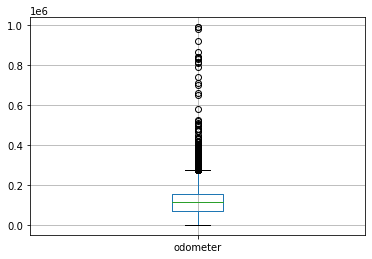

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


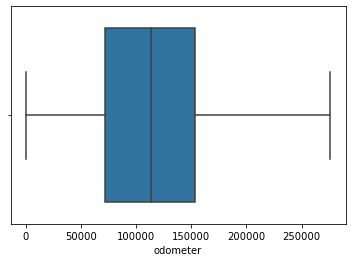

The mean of the column is greater than its median, thus the distribution the odometer column is skewed to the right
---------------------------------------
The statistics of the odometer column are as follows:
count     51524.000000
mean     115454.984032
std       63004.184929
min           0.000000
25%       72000.000000
50%      113918.500000
75%      153772.500000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
The column's minimum border is 9883.260000000002
The column's maximum border is 280906.3899999987
---------------------------------------
The outliers in the column are considered to be values below 9883.260000000002 and above 280906.3899999987
We have 2062 values in the column that can be considered outliers
In the following section I will save a new dataset without the outliers



In [101]:
parameters_percentile('odometer')

### No. of Cylinders

The histogram of the cylinders column


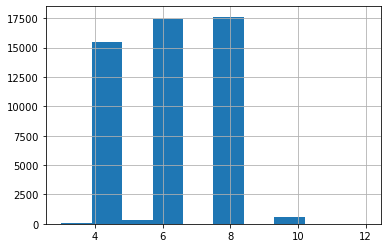

The boxplots of the cylinders column


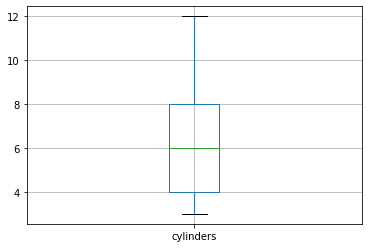

/Users/doronerlich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


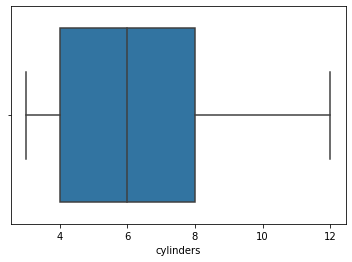

The mean of the column is greater than its median, thus the distribution the cylinders column is skewed to the right
---------------------------------------
The statistics of the cylinders column are as follows:
count    51524.000000
mean         6.120158
std          1.657217
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
The column's minimum border is 4.0
The column's maximum border is 10.0
---------------------------------------
The outliers in the column are considered to be values below 4.0 and above 10.0
We have 36 values in the column that can be considered outliers
In the following section I will save a new dataset without the outliers



In [102]:
parameters_percentile('cylinders')

## Study and treat outliers

In [103]:
limits_list=[]
for parameter in ['price', 'condition', 'vehicle_age', 'odometer', 'cylinders']:
    ninety_nine = np.percentile(vehicles[parameter], 99)
    three = np.percentile(vehicles[parameter], 3)
    limits_list.append([parameter,three,ninety_nine])

In [104]:
limits_list

[['price', 1000.0, 43995.0],
 ['condition', 1.0, 4.0],
 ['vehicle_age', 1.0, 28.0],
 ['odometer', 9883.260000000002, 280906.3899999987],
 ['cylinders', 4.0, 10.0]]

In [105]:
limits_vehicles=pd.DataFrame(limits_list,columns=['parameter','min_border','max_border'])
limits_vehicles

,parameter,min_border,max_border
0,price,1000.00,43995.00
1,condition,1.00,4.00
2,vehicle_age,1.00,28.00
3,odometer,9883.26,280906.39
4,cylinders,4.00,10.00


In the cells above, once I studied the core parameters (price, condition, vehicle_age, odometer and cylinders), I have determined the upper and lower limits of the dataset:
- In the price column values beneath 1,000 and above 43,995 are considered outliers. 
- In the condition column values beneath 1 and above 4 are considered outliers. 
- In the vehicle_age column values beneath 1 and above 28 are considered outliers. 
- In the odometer column values beneath 9,883.26 and above 280,906.39 are considered outliers. 
- In the cylinders column values beneath 4 and above 10 are considered outliers. 

In [106]:
filtered_vehicles = vehicles.copy()

I have created a copy of the dataset and saved it as "filtered_vehicles". 

In [107]:
filtered_vehicles_1 = filtered_vehicles.query('153772.500000 <= odometer <= 280906.39')

I created a new slice of data, since the 3rd quartile (75% mark) is 153,772.5, the maximum limit in the odometer column seemed too high at 280,906.39. 

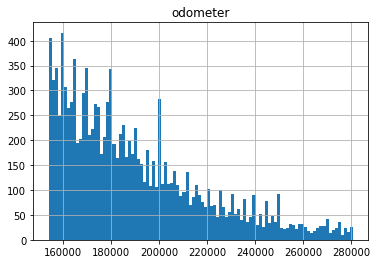

In [108]:
filtered_vehicles_1.hist('odometer', bins=100)
plt.show()

I printed a histogram of the slice - 75% till the max limit, it is noticeable the most of the values are up to 220,000~. Thus, I will set the max limit at 220,000 (and not the original maximum limit of 280,906.39).  

In [109]:
filtered_vehicles = filtered_vehicles.query('1000 <= price and 1 <= condition and 0 <= vehicle_age and 9883.26 <= odometer and 4 <= cylinders')

In the new dataset filtered_vehicles, I created a data slice of the dataset for all values above the lower limits aforementioned. 

In [110]:
filtered_vehicles = filtered_vehicles.query('price <= 43995 and condition <= 4 and vehicle_age <= 28 and odometer <= 220000 and cylinders <= 10')


In the new dataset filtered_vehicles, I created a data slice of the dataset for all values below the upper limits aforementioned. 

In [111]:
filtered_vehicles = pd.DataFrame(filtered_vehicles)

I saved the new dataset, sans the outliers, as a new dataframe. 

In [112]:
filtered_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45452 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 45452 non-null  int64         
 1   model_year            45452 non-null  int64         
 2   model                 45452 non-null  object        
 3   condition             45452 non-null  int64         
 4   cylinders             45452 non-null  int64         
 5   fuel                  45452 non-null  object        
 6   odometer              45452 non-null  float64       
 7   transmission          45452 non-null  object        
 8   type                  45452 non-null  object        
 9   paint_color           45452 non-null  object        
 10  is_4wd                45452 non-null  int64         
 11  date_posted           45452 non-null  datetime64[ns]
 12  days_listed           45452 non-null  int64         
 13  day_posted      

I printed the information of the new dataset, we can see that there are 45,452 rows and 18 columns, of the original dataset 6,072 outliers were removed. 

In [113]:
filtered_vehicles.describe(include='all').T

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_22582/2747952087.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  filtered_vehicles.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
price,45452.0,NaN,NaN,NaN,NaT,NaT,12252.17029,8542.304836,1000.0,5600.0,9900.0,16990.0,43995.0
model_year,45452.0,NaN,NaN,NaN,NaT,NaT,2010.17535,5.101454,1990.0,2007.0,2011.0,2014.0,2019.0
model,45452,100,ford f-150,2462,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,45452.0,NaN,NaN,NaN,NaT,NaT,2.653943,0.675444,1.0,2.0,3.0,3.0,4.0
cylinders,45452.0,NaN,NaN,NaN,NaT,NaT,6.052143,1.627174,4.0,4.0,6.0,8.0,10.0
fuel,45452,5,gas,42151,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,45452.0,NaN,NaN,NaN,NaT,NaT,113032.150549,49578.160976,9900.0,77000.0,114000.0,149679.75,220000.0
transmission,45452,3,automatic,41794,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,45452,13,SUV,11147,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,45452,13,white,8767,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the describe() function we can see that there are still 100 unique values in the model column, 5 in the fuel column, 3 in the transmission column, 13 in the type and paint_color column and there was no change to the unique number of dates when the ads were posted. Also, we can see the upper and lower limits of every core parameter in the min and max columns. We now also have no outliers in the model_year column (minimum year is 1990). 

In the following cell I will print a sample of the new dataset.

In [114]:
filtered_vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,ave_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2014,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,4,22176.0
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.0


## Study core parameters without outliers

In the following sections I will compare the distribution of the values with and without the outliers.

### Price

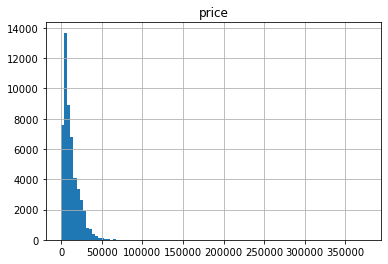

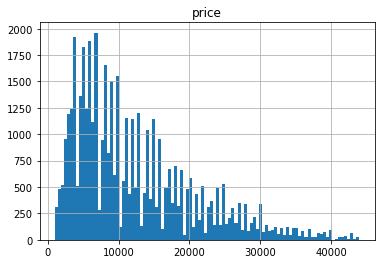

In [115]:
vehicles.hist('price', bins=100)
filtered_vehicles.hist('price', bins=100)
plt.show()

From the graphs above, we can see that in the original dataset the values in the price column were distributed from 0 and up to 350,000. However, the cars priced over 50,000 were outliers and cars priced around 0 were improbable. 
Once the outliers were removed, we can see that most of the cars in the dataset are priced from 1,000 to approx. 44,000. 

### Condition

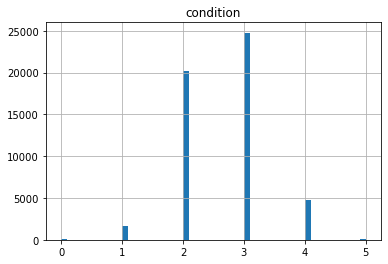

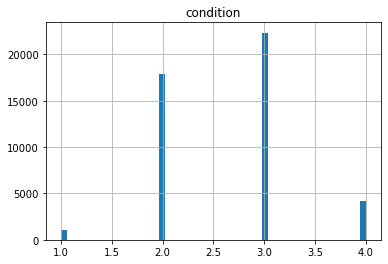

In [116]:
vehicles.hist('condition', bins=50)
filtered_vehicles.hist('condition', bins=50)
plt.show()

In the condition column, we can see that the main conditions were preserved, while the outlier conditions of 1 and 5 (salvage and new) were removed. 

### Vehicle's Age

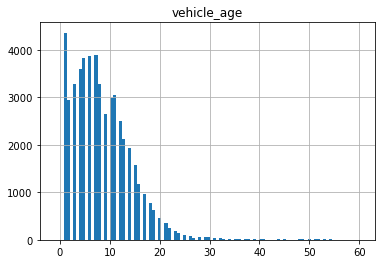

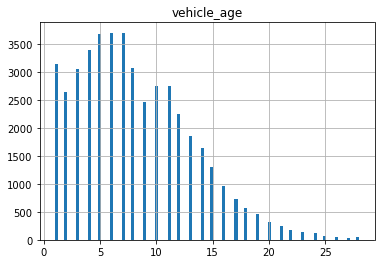

In [117]:
vehicles.hist('vehicle_age', bins=100, range=(-1,60))
filtered_vehicles.hist('vehicle_age', bins=100)
plt.show()

In the distribution in the vehicles age column before the outliers were removed, we can see that there were some cars whose age was below 0 and there were also cars that were quite old, some even older than fifty. These were outliers. Once the outliers were removed, we can see that most of the cars in the new dataset are age between ~3 years and ~12 years. 

### Mileage

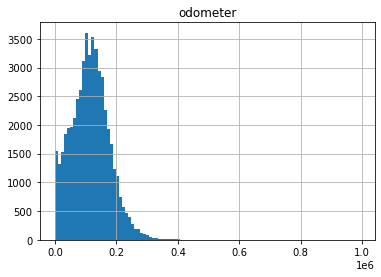

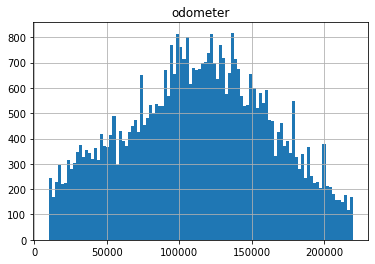

In [118]:
vehicles.hist('odometer', bins=100)
filtered_vehicles.hist('odometer', bins=100)
plt.show()

In the dataset before the outliers were removed, we can see that there were a lot of cars with 0 mileage and there were also cars with very high mileage, some even more than 400,000. Once the outliers were removed, we can see that the lion's share of the cars in the dataset actually had mileage between approx. 10,000 and less than 300,000. 

### No. of Cylinders

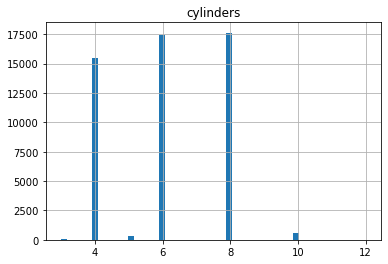

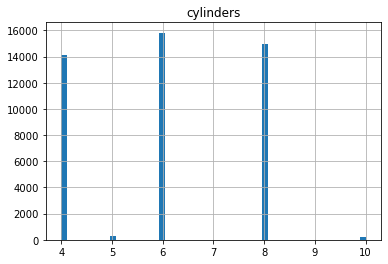

In [119]:
vehicles.hist('cylinders', bins=50)
filtered_vehicles.hist('cylinders', bins=50)
plt.show()

Before the outliers were removed, even though most of the cars in the dataset had 4, 6 or 8 cylinders, we had some cars with 2, 10 and 12 cylinders, but in very low quantities. Once the outliers were removed there are no longer cars with either 2 or 12 cylinders in the dataset and only a few cars with either 5 or 10 cylinders. 

## Ads lifetime

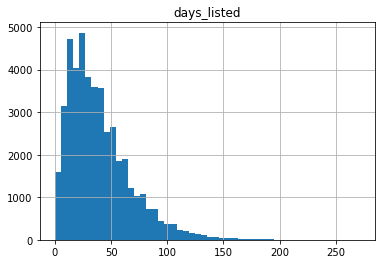

In [120]:
filtered_vehicles.hist('days_listed', bins=50, range=(0,271))
plt.show()

In [121]:
filtered_vehicles.days_listed.describe()

count    45452.000000
mean        39.581735
std         28.267518
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

We can see that the average lifetime of an ad is approx. 39.5 days and the median lifetime of an ad is 33 days. Most ads are posted for 19-53 days. However there are some ads that were posted for 0-19 days and some from more than 70 days and even up to 271 days. 

In [122]:
listed_below = filtered_vehicles.query('0 <= days_listed <= 19')

In [123]:
listed_below.describe(include='all').T

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_22582/476608905.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listed_below.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
price,11920.0,NaN,NaN,NaN,NaT,NaT,12214.742282,8531.591891,1000.0,5600.0,9800.0,16990.0,43995.0
model_year,11920.0,NaN,NaN,NaN,NaT,NaT,2010.154782,5.167368,1990.0,2007.0,2011.0,2014.0,2019.0
model,11920,100,ford f-150,670,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,11920.0,NaN,NaN,NaN,NaT,NaT,2.656711,0.686503,1.0,2.0,3.0,3.0,4.0
cylinders,11920.0,NaN,NaN,NaN,NaT,NaT,6.045302,1.632108,4.0,4.0,6.0,8.0,10.0
fuel,11920,4,gas,11048,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,11920.0,NaN,NaN,NaN,NaT,NaT,113273.259186,50020.418632,9945.0,76060.0,114844.0,150356.0,220000.0
transmission,11920,3,automatic,10968,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,11920,13,sedan,2901,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,11920,13,white,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I have sliced the dataset and saved the ads that were posted for between 0-19 days in the variable listed_below, and examined their characteristics.
There are only 11,918 cars that were listed for that amount of days, their model type consists of all model types in the dataset but ford f-150 appears most frequently (670 times), their condition ranges from 1-4 (most likely 3), and otherwise the cars' characteristics are like those of the rest of the data - most likely automatic white sedans fueled by gas whose age ranges from 0-28, as does their price and mileage.   

In [124]:
listed_above = filtered_vehicles.query('70 <= days_listed <= 271')

In [125]:
listed_above.describe(include='all').T

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_22582/3387782586.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listed_above.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
price,6201.0,NaN,NaN,NaN,NaT,NaT,12249.197065,8471.181086,1000.0,5700.0,9988.0,16900.0,43995.0
model_year,6201.0,NaN,NaN,NaN,NaT,NaT,2010.212708,5.033315,1990.0,2007.0,2011.0,2014.0,2019.0
model,6201,100,ford f-150,312,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,6201.0,NaN,NaN,NaN,NaT,NaT,2.647637,0.672392,1.0,2.0,3.0,3.0,4.0
cylinders,6201.0,NaN,NaN,NaN,NaT,NaT,6.067247,1.635146,4.0,4.0,6.0,8.0,10.0
fuel,6201,4,gas,5758,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,6201.0,NaN,NaN,NaN,NaT,NaT,113461.908603,49291.416052,10000.0,78840.0,115000.0,149941.0,220000.0
transmission,6201,3,automatic,5744,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,6201,13,SUV,1559,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,6201,13,white,1204,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I have sliced the dataset and saved the ads that were posted for between 70-271 days in the variable listed_above, and examined their characteristics. 
There are only 6,200 cars that were listed for that amount of days, their model type consists of all model types in the dataset but ford f-150 appears most frequently (312 times), their condition ranges from 1-4 (but most likely 3), and otherwise the cars' characteristics are like those of the rest of the data - most likely automatic white SUVs fueled by gas whose age ranges from 0-28, as does their price and mileage.  

I was not able to ascertain any specific characteristics of the cars that were listed for a number of days below the 1st quartile and above the 3rd quartile. 

## Average price per each type of vehicle

In [126]:
type_ads_price = filtered_vehicles.groupby('type')['price'].agg(['count','mean']).reset_index().sort_values('count', ascending=False)

I have created a pivot table called "type_ads_price", grouping the cars in the filtered dataset by type of car, counting the number of ads were posted for each type and the average price. 

In [127]:
type_ads_price.columns=['car_type','number_of_ads','ave_price']

I have renamed the columns of the pivot table. 

In [128]:
type_ads_price

,car_type,number_of_ads,ave_price
0,SUV,11147,11431.499865
9,sedan,11032,7225.842186
10,truck,10579,16936.731260
8,pickup,6113,16366.386717
3,coupe,1816,13825.192731
12,wagon,1398,9557.520744
5,mini-van,1074,8269.726257
4,hatchback,936,7040.891026
11,van,572,11283.982517
2,convertible,349,12913.532951


From the table above, we can see that the two most popular car types are SUV and sedan, though they don't the highest average price. The car types with highest average price are buses and trucks, buses have the lowest number of ads posted and trucks are 3rd most popular type. 

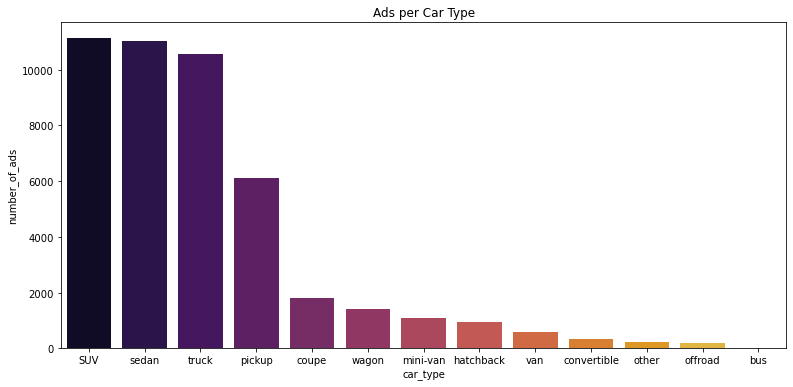

In [129]:
f, ax = plt.subplots(figsize=(13, 6))
sns.barplot(x='car_type',y="number_of_ads", palette=sns.color_palette('inferno', 13), data=type_ads_price)
plt.title("Ads per Car Type")
plt.show()

From the analysis above, it is clear that the two types of cars with the most ads posted are SUV (11,147 ads) and sedan (11,032 ads). 

## Price factors

As I surmised in the previous section, the two car types with the most posted ads are SUVs and sedans. Hereinafter, I will study the price factors for each of these car types. 

### Car Type SUV

In [130]:
SUV_data = filtered_vehicles.query('type == "SUV"')

I have created a slice of the dataset containing only the rows where car type is SUV and saved it in the variable "SUV_data". Then, I saved those rows with the price, condition, odometer, paint_color and vehicle_age columns in the variable "SUV_scatter" and printed the resulting table. 

In [131]:
SUV_scatter=SUV_data[['price','condition','odometer','transmission','paint_color','vehicle_age']]
SUV_scatter 

,price,condition,odometer,transmission,paint_color,vehicle_age
0,9400,2,145000.0,automatic,unknown,7
7,15990,3,109473.0,automatic,black,6
8,11500,3,104174.0,automatic,unknown,6
9,9200,3,147191.0,automatic,blue,11
14,12990,3,132285.0,automatic,black,10
...,...,...,...,...,...,...
51495,9500,2,144500.0,automatic,unknown,7
51496,4999,3,177901.0,automatic,unknown,16
51500,6995,3,157000.0,automatic,white,6
51502,7995,4,111088.0,automatic,unknown,8


In [132]:
SUV_scatter.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,11147.0,NaN,NaN,NaN,11431.499865,7753.402851,1000.0,5750.0,9200.0,14999.0,43900.0
condition,11147.0,NaN,NaN,NaN,2.705212,0.65892,1.0,2.0,3.0,3.0,4.0
odometer,11147.0,NaN,NaN,NaN,117541.299655,48031.574486,9949.0,85000.0,119953.0,153000.0,220000.0
transmission,11147,3,automatic,10607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,11147,13,unknown,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_age,11147.0,NaN,NaN,NaN,8.398044,4.91232,1.0,5.0,8.0,11.0,28.0


I used the describe() function to review the distribution of the various columns in "SUV_scatter". It is noticeable that the cars within the slice have no unique characteristics compared with the rest of the dataset - no unusual price, condition, odometer of age range.  

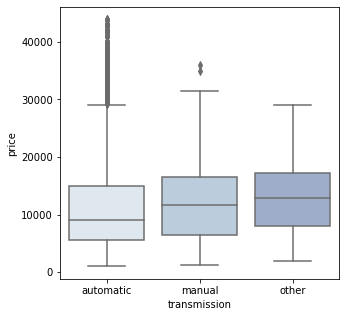

In [133]:
plt.figure(figsize=(5,5))
sns.boxplot(x="transmission", y="price", palette=sns.color_palette('BuPu'), data=SUV_scatter)
plt.show()

In [134]:
SUV_scatter['transmission'].value_counts()

automatic    10607
manual         451
other           89
Name: transmission, dtype: int64

I have used boxplot and the value_counts() function to check the distribution of the catagorical values in the transmission column and its correlation with the price column. 

We can see the most SUVs have automatic transmission (as all car types in the dataset). For SUVs with automatic transmission, the median price is ~10,000 while the maximum price is ~30,000. However, while there are fewer SUVs with manual transmission, they have a wider price range and their median price is above 10,000. SUVs with a transmission that is neither automatic or manual are the least common, their price range is similar to SUVs with automatic transmission and their median price is the highest of the three. 

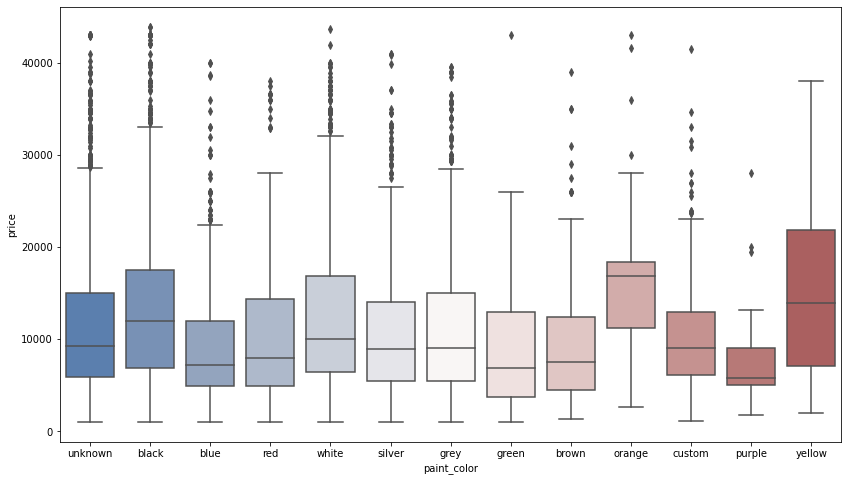

In [135]:
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", palette=sns.color_palette('vlag', 13), data=SUV_scatter)
plt.show()

In [136]:
SUV_scatter['paint_color'].value_counts()

unknown    1985
black      1978
white      1780
silver     1428
grey       1082
blue        944
red         825
green       377
brown       331
custom      258
orange       82
yellow       42
purple       35
Name: paint_color, dtype: int64

In [137]:
SUV_scatter.groupby('paint_color')['price'].agg(['count','mean']).reset_index().sort_values('mean', ascending=False)

,paint_color,count,mean
6,orange,82,16037.000000
12,yellow,42,15368.857143
0,black,1978,13548.742164
11,white,1780,12426.373034
10,unknown,1985,11611.208564
5,grey,1082,11260.006470
9,silver,1428,10532.947479
3,custom,258,10491.841085
8,red,825,10374.873939
1,blue,944,9032.888771


I have used boxplot, the value_counts() function and a table grouping the SUVs by paint_color and calculating their mean price to check the distribution of the catagorical values in the paint_color column and its correlation with the price column. 

We can see that most SUVs are either black or white (as all car types in the dataset), their price range is a bit similar but black SUVs have higher median and mean price. However, while there are a lot fewer SUVs in orange and yellow (82 and 42, respectively), their median and mean price is higher. It should also be noted that yellow SUVs have the widest price range.  

                price  condition  odometer  vehicle_age
price        1.000000   0.278856 -0.657482    -0.638827
condition    0.278856   1.000000 -0.323882    -0.284470
odometer    -0.657482  -0.323882  1.000000     0.649385
vehicle_age -0.638827  -0.284470  0.649385     1.000000


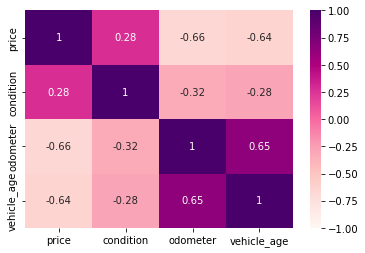

In [138]:
print(SUV_scatter.corr())
sns.heatmap(SUV_scatter.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'RdPu')
plt.show()

I have used the correlation function to check the correlation between the numerical values in the data slice - we can see that there is correlation between the SUVs' price and their condition, age and mileage. The correlation between price and mileage and price and age is high.  

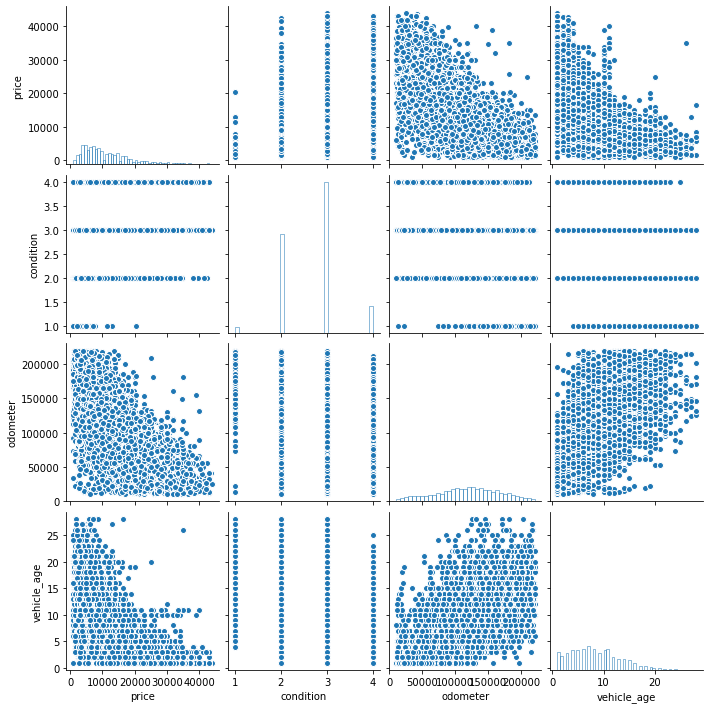

In [139]:
sns.pairplot(SUV_scatter,plot_kws=dict(marker="o", linewidth=1),
    diag_kws=dict(fill=False),)
plt.show()

In the scatter plot above, we can see the previously indicated correlations. When the car's condition is between 2-4 (good-like new), the price of the car is higher. The correlation is even more visible between the price and the car's mileage and the price and the car's age: the less mileage the car has/the younger the car, the higher the price. The more "wear" the car has, or the older it is, the lower the price. 

### Car Type Sedan

In [140]:
sedan_data = filtered_vehicles.query('type == "sedan"')

I have created a slice of the dataset containing only the rows where car type is sedan and saved it in the variable "sedan_data". Then, I saved those rows with the price, condition, odometer, paint_color and vehicle_age columns in the variable "sedan_scatter" and printed the resulting table. 

In [141]:
sedan_scatter=sedan_data[['price','condition','odometer','transmission','paint_color','vehicle_age']]
sedan_scatter 

,price,condition,odometer,transmission,paint_color,vehicle_age
2,5500,4,110000.0,automatic,red,6
4,14900,3,80903.0,automatic,black,2
5,14990,3,57954.0,automatic,black,4
6,12990,3,79212.0,automatic,white,3
11,8990,3,111142.0,automatic,grey,7
...,...,...,...,...,...,...
51518,3750,3,110200.0,automatic,silver,13
51520,9249,4,88136.0,automatic,black,5
51522,3950,3,128000.0,automatic,blue,9
51523,7455,2,139573.0,automatic,black,5


In [142]:
sedan_scatter.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,11032.0,NaN,NaN,NaN,7225.842186,4051.228788,1000.0,4200.0,6295.0,9495.0,40000.0
condition,11032.0,NaN,NaN,NaN,2.71066,0.676906,1.0,2.0,3.0,3.0,4.0
odometer,11032.0,NaN,NaN,NaN,107172.686594,45625.913415,9930.0,75000.0,105864.75,140000.0,220000.0
transmission,11032,3,automatic,10449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,11032,13,unknown,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_age,11032.0,NaN,NaN,NaN,7.43827,4.359928,1.0,4.0,7.0,10.0,28.0


I used the describe() function to review the distribution of the various columns in "sedan_scatter". It is noticeable that the cars within the slice have no unique characteristics compared with the rest of the dataset - no unusual price, condition, odometer of age range.

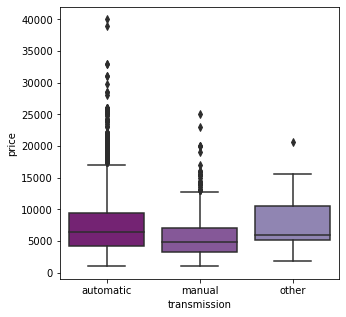

In [143]:
plt.figure(figsize=(5,5))
sns.boxplot(x="transmission", y="price", palette=sns.color_palette('BuPu_r'), data=sedan_scatter)
plt.show()

In [144]:
sedan_scatter['transmission'].value_counts()

automatic    10449
manual         516
other           67
Name: transmission, dtype: int64

I have used boxplot and the value_counts() function to check the distribution of the catagorical values in the transmission column and its correlation with the price column. 

We can see the most sedans have automatic transmission (as all car types in the dataset). For sedans with automatic transmission, the median price is ~7,000 while the maximum price is ~18,000. However, even though sedans with a transmission that is neither automatic or manual are the least common, their price range is wider than sedans with manual transmission (the second most common transmission in the dataset) and their median price is closer to that of sedans with automatic transmission than those with manual transmission. 

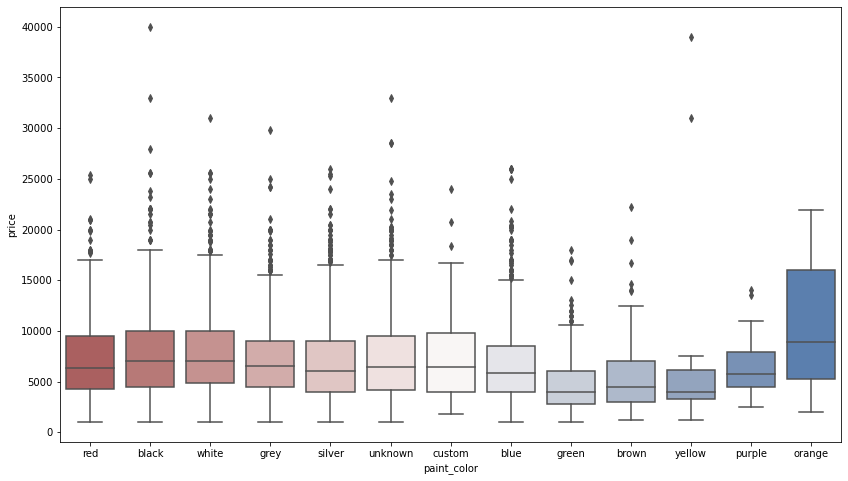

In [145]:
plt.figure(figsize=(14,8))
sns.boxplot(x="paint_color", y="price", palette=sns.color_palette('vlag_r', 13), data=sedan_scatter)
plt.show()

In [146]:
sedan_scatter['paint_color'].value_counts()

unknown    1972
silver     1901
black      1626
grey       1494
white      1356
blue       1124
red         835
custom      249
brown       241
green       183
purple       22
yellow       20
orange        9
Name: paint_color, dtype: int64

In [147]:
sedan_scatter.groupby('paint_color')['price'].agg(['count','mean']).reset_index().sort_values('mean', ascending=False)

,paint_color,count,mean
6,orange,9,10593.888889
11,white,1356,7785.659292
0,black,1626,7747.982780
8,red,835,7317.340120
3,custom,249,7305.871486
12,yellow,20,7254.000000
10,unknown,1972,7229.317951
5,grey,1494,7191.794511
9,silver,1901,7101.502893
1,blue,1124,6695.315836


I have used boxplot, the value_counts() function and a table grouping the sedans by paint_color and calculating their mean price to check the distribution of the catagorical values in the paint_color column and its correlation with the price column. 

We can see that most sedans are either black, white or grey, their price range is a bit similar but black sedans have the widest range of the three and the higher median. White sedan have smiliar median price and higher mean price. However, while orange sedans are the least common of all the sedans in the data slice (9 out of 11,032), orange sedans have the widest price range, highest median price and the highest mean price. 

                price  condition  odometer  vehicle_age
price        1.000000   0.295049 -0.654947    -0.675298
condition    0.295049   1.000000 -0.323544    -0.258300
odometer    -0.654947  -0.323544  1.000000     0.617638
vehicle_age -0.675298  -0.258300  0.617638     1.000000


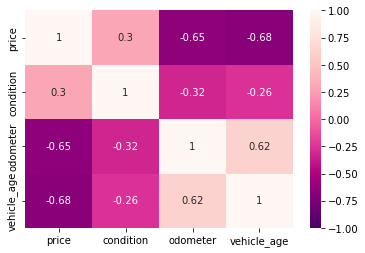

In [148]:
print(sedan_scatter.corr())
sns.heatmap(sedan_scatter.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'RdPu_r')
plt.show()

I have used the correlation function to check the correlation between the numerical values in the data slice - we can see that there is correlation between the sedans' price and their condition, age and mileage. The correlation between price and mileage and price and age is high.  

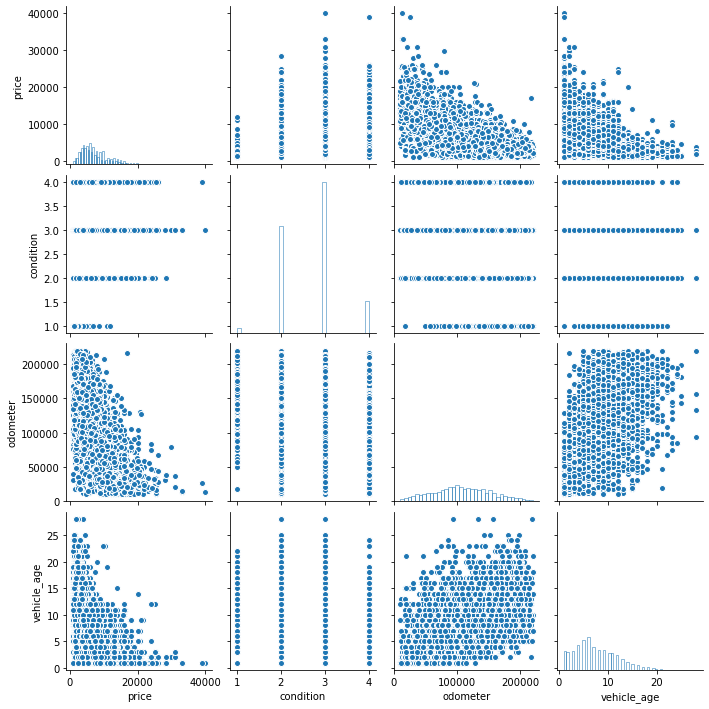

In [149]:
sns.pairplot(sedan_scatter, plot_kws=dict(marker="o", linewidth=1),
    diag_kws=dict(fill=False),)
plt.show()

In the scatter plot above, we can see the previously indicated correlations. When the car's condition is between 2-4 (good-like new), the price of the car is higher - this is even clearer with sedans than with SUVs and sedans in excellent condition are the highest priced. The correlation is even more visible between the price and the car's mileage and the price and the car's age: the less mileage the car has/the younger the car, the higher the price. The more "wear" the car has, or the older it is, the lower the price. 

## General conclusion

In this report we started with a dataset consisting of 51,525 rows and 13 columns. At first glance, it was visible that there were missing values, incorrect data types and outliers in the dataset. 

**Data preprocessing**

Filling in of missing values in the dataset:
- paint_color: there were 9,267 missing values in the column and no duplicates, since there is no way to derive the color of the car from the dataset I have filled in the missing values with the value "unknown".
- is_4wd: More than half of the values in this column were missing (25,572 out of 51,525). I assumed that this column should have been comprised of 1s and 0s (indicating a Yes or No answer). Due to the high percentage of the missing values, the nature of values and the lack of "0" values in the column, I surmised that the values are missing because of a technical error and filled in the missing values with "0". 
- model_year: there were 3,619 missing values in the column. To fill in the missing values with the model_year median grouped by model and odometer. There were some missing values left in the column, I filled those with the median of model_year grouped only by model.
- cylinders: there were 5,260 missing values in the column. I have filled the missing values with the median of the column grouped by model and model year. However, even though most of the missing values were filled, there are still some missing values in the column. I filled the remaining missing values with the median of the cylinders column grouped only by the model column.  
- odometer: there were 7,892 missing values in the column. I filled in the missing values with the median of the odometer column grouped by model_year, model and condition of the car. Again, there were some missing values that remained - I filled them with the median of the colum grouped only by the model_year of the car. After that, I located one row out of the dataset with a value missing in the odometer column, row 45694. Since I determined that this row was an outlier (model year 1929) - I removed the row from the dataset. 

I have finished the section with 51,524 rows and no missing values. 
Once I filled in all the missing values, I checked whether there were any duplicate rows in the dataset - none were located. 

Then, I fixed incorrect data types in the data set: 
- model_year: the data type of the column was a float, I fixed it and changed it to int. 
- cylinders: the data type of the column was a float, I fixed it and changed it to int.
- is_4wd: the data type of the column was an object, I fixed it and changed it to int.
- date_posted: the data type of the column was an object, I fixed it and changed it to datetime.

I re-examined the data types in the dataset, the data types were altered and correct. 
    

**Enriching the dataset, adding columns and altering values**

Once I finished preprocessing the dataset, I added 5 new columns:
- day_posted: a column indicating the day of the week the ad was posted.
- month_posted: a column indicating the month the ad was posted.
- year_posted: a column indicating the year the ad was posted.
- vehicle_age: a column indicating the age of the vehicle when the ad was posted by subtracting the car's model year from the year the ad was posted. While adding this column I encounted negative values and values that are 0, I replace them with 1. 
- ave_mileage_per_year: a column indicating the average mileage per year of the car when the ad was posted.  
    


I altered the values in the condition column from object to int using a dictionary, thus: 
- salvage = 0;
- fair = 1;
- good = 2;
- excellent = 3;
- like new = 4;
- new = 5.

**Outliers**

In this stage of the report, the dataset consisted of 51,524 row and 18 columns. I have studied the core parameters of the dataset: price, condition, vehicles' age, mileage and number of cylinders. I determined the skewness of the column and the minimum and maximum limits: 
- price: the column is skewed to the right, the minimum limit is 1000.0 and the maximum limit is 43995.0.
- condition: the column is skewed to the left, the minimum limit is 1.0 and the maximum limit is 4.0. 
- vehicle_age: the column is skewed to the right, the minimum limit is 0.0 and the maximum limit is 28.0.
- odometer: the column is skewed to the right, the minimum limit is 9883.26 and the maximum limit is 280906.389.
- cylinders: the column is skewed to the right, the minimum limit is 4.0 and the maximum limit is 10.0

I removed the 6,072 outliers below the minimum limits and the maximum limits of each core parameters. While I was determining the limits and what values were considered outliers, I determined that the maximum limit in the odometer column is too high - I thus determined that the maximum limit in this column is 220,000. 

I copied the dataset as filtered_vehicles and removed the outliers according to the abovementioned minimum and maximum limits. When I was done, the filtered dataset consisted of 45,452. Then, I studied and compared the core parameters of the dataset before removing the outliers and after.

I studied the ads lifetime, determined that the mean and median of the days an ad was posted was approx. 33 days. I was not able to ascertain any specific characteristics of the cars that were listed for a number of days below the 1st quartile and above the 3rd quartile.

I created a pivot table called "type_ads_price", grouping the cars in the filtered dataset by type of car, counting the number of ads posted for each type and the average price and determined that the two most popular car types were SUVs and sedans.

**Analysis and Conclusions** 

I studied the price factors (price, condition, odometer, transmission, paint_color and vehicle_age) of two of the most popular car types, SUVs and sedans:
- SUVs: 
1. The overwhelming majority of SUVs have an automatic transmission. However, while there are fewer SUVs with manual transmission, they have a wider price range and their median price is higher. SUVs with a transmission that is neither automatic or manual are the least common, their price range is similar to SUVs with automatic transmission and their median price is the highest.
2. Most SUVs are either black or white (as all car types in the dataset), their price range is similar but black SUVs have higher median and mean price. However, while there are a lot fewer SUVs painted orange and yellow (82 and 42, respectively), their median and mean price is higher. Yellow SUVs have the widest price range. 
3. There is correlation between the SUVs' price and their condition, age and mileage. The correlation between price and mileage and price and age is high - the younger the car, with less mileage, the higher the price.

- Sedans: 
1. The overwhelming majority of sedans have automatic transmission (as all car types in the dataset). However, even though sedans with a transmission that is neither automatic or manual are the least common, their price range is wider than sedans with manual transmission (the second most common transmission in the dataset) and their median price is closer to that of sedans with automatic transmission than those with manual transmission. 
2. Most sedans are either black, white or grey, and their price range is a similar but black sedans have the widest range of the three and the high median. White sedan have smiliar median price and higher mean price. However, while orange sedans are the least common of all sedans in the data slice (9 out of 11,032), orange sedans have the widest price range, highest median price and the highest mean price.
3. There is correlation between the sedans' price and their condition, age and mileage. The correlation between price and mileage and price and age is high - the younger the car, with less mileage, the higher the price.

**This report's final conclussion is that even though a car's condition, mileage and age affect a car's price - the younger the car with less mileage, the higher its price.** 


